In [948]:
%run scripts/python/standardize.py
%matplotlib inline

In [757]:
miami_pro = pd.read_json('https://opendata.miamidade.gov/resource/8u3a-jyk6.json?$limit=50000')

In [758]:
br_pro = pd.read_json('https://data.brla.gov/resource/wqnv-frwf.json?$limit=50000')

In [126]:
pd.options.display.max_columns = 45
miami_pro.head()

,amount,areacode,commodity,commodityname,country,createdate,linenumber,phone,phoneextension,ponumber,quantity,size,term1,term2,term3,term4,term5,term6,term7,term8,term9,unitcost,vendorlocation,vendorname,zipcode
0,71.64,NaN,670,"PLUMBING EQUIPMENT, FIXTURES, AND SUPPLIES",US,2017-01-17T00:00:00,1,NaN,NaN,POID1703628,1.0,EA,3/8 OD EZ CONNECT TEE LF QUICK (10 EA @ $6.23),NaN,NaN,CONTACT: NICK ROBULOCK 786-469-2711,NaN,NaN,NaN,NaN,NaN,62.30,"{'human_address': '{""address"":""PO BOX 680730"",...",LION PLUMBING SUPPLY INC,331680730.0
1,387.36,678.0,75,AUTOMOTIVE SHOP EQUIPMENT AND SUPPLIES,US,2017-01-11T00:00:00,1,421-5683,NaN,POAV1700817,144.0,EA,AUTOMOTIVE SHOP EQUIPMENT AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.69,"{'human_address': '{""address"":""PO BOX 409043"",...",GENUINE PARTS CO,303849043.0
2,351.44,305.0,615,"OFFICE SUPPLIES, GENERAL",US,2017-01-04T00:00:00,8,887-7339,NaN,POCC1700185,6.0,EA,DYLINE CORRECTION TAPE,ITEM # PAP87813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.95,"{'latitude': '25.846674', 'human_address': '{""...",J & E OFFICE SUPPLIES INC,331662221.0
3,2892.84,305.0,670,"PLUMBING EQUIPMENT, FIXTURES, AND SUPPLIES",US,2017-01-17T00:00:00,12,576-3054,NaN,POWS1705446,1.0,EA,"PLUMBING EQUIPMENT, FIXTURES,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196.72,"{'latitude': '25.80383', 'human_address': '{""a...",LEHMAN PIPE & PLUMBING SUPPLY INC,33127.0
4,1240.00,NaN,98120,RENTAL OR LEASE OF CONSTRUCTION EQUIPMENT,US,2017-01-18T00:00:00,1,NaN,NaN,POMT1701644,1.0,EA,THIS PURCHASE ORDER IS CREATED TO PROCURE THE ...,DEPT. OF TRANSPORTATION AND PUBLIC WORKS FOR M...,FOR AN INVOICE FROM SUNBELT RENTALS FOR THE 1-...,STRAIGHT MAST FORKLIFT. THIS ACQUISITION WAS I...,FINALIZED BY TRACK AND GUIDEWAY.,NaN,INVOICE DATES: 12/12/2016 TO 1/08/2017 ...,NaN,EQUIPMENT PART # ...,1240.00,"{'human_address': '{""address"":""PO BOX 409211"",...",SUNBELT RENTALS INC,30384.0


In [6]:
br_pro.head()

,cstctr,cstctr_desc,dept_desc,deptno,dt_qty_ord,dt_qty_um,dt_seq,dt_stock_desc,dt_tot_cost,dt_um_desc,...,vend_cont_name,vend_cont_ph_ext,vend_cont_phone,vend_cont_title,vend_minority_abbr,vend_minority_desc,vend_name_1,vend_name_2,vend_state,vend_zip
0,1200,LIBRARY BOARD OF CONTROL,LIBRARY BOARD OF CONTROL,12,NaN,NaN,NaN,NaN,NaN,NaN,...,JOHN E HIMES,NaN,2.149247e+09,REG SALES MGR,NaN,NaN,ENVISIONWARE INC,NaN,GA,30097
1,1200,LIBRARY BOARD OF CONTROL,LIBRARY BOARD OF CONTROL,12,1.0,EA,1.0,MAINTENANCE AND SUPPORT FOR THE LIBRARY'S ...,6119.25,EACH,...,JOHN E HIMES,NaN,2.149247e+09,REG SALES MGR,NaN,NaN,ENVISIONWARE INC,NaN,GA,30097
2,2010,CITY COURT-ADMINISTRATION,CITY COURT,20,NaN,NaN,NaN,NaN,NaN,NaN,...,CATHY FIELDS,NaN,8.002842e+09,ACCOUNTANT I,NON-M WBE,MINORITY TYPE - NON-MINORITY WBE,BI,BEHAVIORIAL INTERVENTIONS,CO,80301
3,2010,CITY COURT-ADMINISTRATION,CITY COURT,20,400.0,EA,1.0,HOMEGUARD 200 MONITORING SERVICE CHARGE (PER U...,940.00,EACH,...,CATHY FIELDS,NaN,8.002842e+09,ACCOUNTANT I,NON-M WBE,MINORITY TYPE - NON-MINORITY WBE,BI,BEHAVIORIAL INTERVENTIONS,CO,80301
4,2010,CITY COURT-ADMINISTRATION,CITY COURT,20,200.0,EA,2.0,HG206 HOMEGUARD DIGITAL CELL MONITORING SERVIC...,400.00,EACH,...,CATHY FIELDS,NaN,8.002842e+09,ACCOUNTANT I,NON-M WBE,MINORITY TYPE - NON-MINORITY WBE,BI,BEHAVIORIAL INTERVENTIONS,CO,80301


We will assume that input_date (baton rouge) and create_date (miami) are both associated with when the contract was awareded to the contractor 

In [759]:
wash_pro = pd.read_csv('Purchase_Orders_in_2017.csv')

In [25]:
wash_pro.head()

,PO_NUMBER,AGENCY_NAME,NIGP_DESCRIPTION,PO_TOTAL_AMOUNT,ORDER_DATE,SUPPLIER,FISCAL_YEAR,OBJECTID
0,PO556681,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,"2009230:COATS, CHEF'S, TWILL, 65% POLYESTER, 3...",259.00,2016-12-20T00:00:00.000Z,Imageone Uniforms,2017,307240
1,PO555053,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,"SUPPLIES, SCHOOL, VARIOUS (NOT OTHERWISE CLASS...",139.11,2016-11-22T00:00:00.000Z,AMERICAN EXPRESS COMPANY,2017,307241
2,PO555053,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,"SUPPLIES, SCHOOL, VARIOUS (NOT OTHERWISE CLASS...",9.53,2016-11-22T00:00:00.000Z,AMERICAN EXPRESS COMPANY,2017,307242
3,PO554803,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,Janitorial Management Services,78.04,2016-11-18T00:00:00.000Z,General Merchandise Supplies,2017,307243
4,PO555102-V2,OFFICE OF ADMINISTRATIVE HEARINGS,POSTAGE STAMPS,30000.00,2016-12-06T00:00:00.000Z,PITNEY BOWES,2017,307244


The Washington dataset is for purchase orders greater than $25000

In [26]:
wash_pro.columns

Index(['PO_NUMBER', 'AGENCY_NAME', 'NIGP_DESCRIPTION', 'PO_TOTAL_AMOUNT',
       'ORDER_DATE', 'SUPPLIER', 'FISCAL_YEAR', 'OBJECTID'],
      dtype='object')

In [27]:
miami_pro.columns

Index(['amount', 'areacode', 'commodity', 'commodityname', 'country',
       'createdate', 'linenumber', 'phone', 'phoneextension', 'ponumber',
       'quantity', 'size', 'term1', 'term2', 'term3', 'term4', 'term5',
       'term6', 'term7', 'term8', 'term9', 'unitcost', 'vendorlocation',
       'vendorname', 'zipcode'],
      dtype='object')

In [28]:
br_pro.columns

Index(['cstctr', 'cstctr_desc', 'dept_desc', 'deptno', 'dt_qty_ord',
       'dt_qty_um', 'dt_seq', 'dt_stock_desc', 'dt_tot_cost', 'dt_um_desc',
       'dt_unit_cost', 'empl_inp', 'po_balance', 'po_category',
       'po_category_desc', 'po_in_date', 'po_num', 'po_stat', 'po_stat_desc',
       'po_type_cd', 'po_type_desc', 'purc_agent', 'rec_type', 'req_num',
       'total_amt', 'total_items', 'unique_id', 'vchd_amt', 'vend',
       'vend_addr_1', 'vend_addr_2', 'vend_city', 'vend_cont_name',
       'vend_cont_ph_ext', 'vend_cont_phone', 'vend_cont_title',
       'vend_minority_abbr', 'vend_minority_desc', 'vend_name_1',
       'vend_name_2', 'vend_state', 'vend_zip'],
      dtype='object')

In [760]:
br_pro = br_pro[['unique_id','dt_stock_desc','po_num','po_in_date','po_stat','dt_qty_ord','dt_unit_cost','total_amt','vend_name_1',
       'vend_name_2', 'vend_state', 'vend_zip','vend',
       'vend_addr_1', 'vend_addr_2', 'vend_city','vend_cont_phone','dept_desc']]

In [761]:
br_pro['vendorname'] = br_pro[['vend_name_1','vend_name_2']].apply(lambda x: combine_cols(x),axis=1)

In [762]:
br_pro_less = br_pro[['dt_stock_desc','po_in_date','vendorname','total_amt']].rename(columns={
    'dt_stock_desc':'commodity','po_in_date':'createdate','total_amt':'amount'})

In [763]:
miami_pro_less = miami_pro[['amount','commodityname','createdate','vendorname']].rename(columns={
    'commodityname':'commodity'})

In [764]:
wash_pro_less = wash_pro[['NIGP_DESCRIPTION', 'PO_TOTAL_AMOUNT','ORDER_DATE','SUPPLIER']].rename(columns={
    'NIGP_DESCRIPTION':'commodity',
    'ORDER_DATE':'createdate', 
    'PO_TOTAL_AMOUNT':'amount',
    'SUPPLIER':'vendorname'})

In [123]:
check_na(br_pro_less)

value,False,True
variable,,
dept_desc,4224,0
dt_stock_desc,3161,1063
po_in_date,4224,0
po_num,4224,0
total_amt,4224,0
unique_id,4224,0
vendorname,4224,0


In [152]:
def describe_all(dfs):
    for idx,df in enumerate(dfs):
        print(idx)
        print(df.describe())

In [162]:
miami_pro_less.commodity.value_counts()

AUTOMOTIVE MAINTENANCE ITEMS AND        REPAIR/REP    4490
PLUMBING EQUIPMENT, FIXTURES, AND       SUPPLIES      3137
ELECTRICAL EQUIPMENT AND SUPPLIES       (EXCEPT CA    3111
HAND TOOLS (POWERED AND NON-POWERED),   ACCESSORIE    1704
UNIFORMS, COTTON, BLENDS AND SYNTHETIC: BAND, FIRE    1486
SALE OF BUILDERS SUPPLIES                             1151
BOOTS, LEATHER                                         967
MOTORS AND PARTS, FRACTIONAL H.P.       ELECTRIC       825
AIR CONDITIONERS: COMMERCIAL, AND PARTS AND ACCESS     785
OFFICE SUPPLIES, GENERAL                               722
FIRST AID AND SAFETY EQUIPMENT AND      SUPPLIES (     648
RECYCLED OFFICE SUPPLIES                               646
LABORATORY EQUIPMENT AND ACCESSORIES    (FOR GENER     542
PAINTS, USDA APPROVED                                  536
JANITORIAL AND CLEANING SUPPLIES                       532
MEASURING INSTRUMENTS, ANALOG AND       DIGITAL (F     523
HYDRAULIC SYSTEM COMPONENTS AND PARTS,  AUTOMOTIVE     5

In [163]:
br_pro_less.commodity.value_counts()

RFID DISC MEDIA UNLOCKING DEVICE                                                                                                                                                                                                                                13
ACCOUNTING CHANGES                                                                                                                                                                                                                                              12
EXTERIOR RFID CHECK IN SYSTEM WITH RECEIPT PRINTER AND LCD MONITOR                                                                                                                                                                                              12
STAFF CIRCULATION WORKSTATION WITH CONVERSION      SOFTWARE AND PAD                                                                                                                                                            

In [164]:
wash_pro_less.commodity.value_counts()

9182930:CONSULTING SERVICES RELATED TO THE IMPLEMENTATION OF SOFTWARE                                                                                        1335
EDUCATIONAL TRAINING CONSULTANT SERVICES                                                                                                                     1195
9615036:DEPOSITIONS AND EXPERT WITNESS TESTIMONY                                                                                                              949
9204520:MAINTENANCE AND LICENSE AGREEMENT SERVICES, MICROCOMPUTER SOFTWARE                                                                                    663
9620700:Arts Services (Cultural, Design, Visual, etc.)                                                                                                        637
SUPPLIES, SCHOOL, VARIOUS (NOT OTHERWISE CLASSIFIED)                                                                                                          601
Professional Services, Subco

In [151]:
br_pro_less.head()

,commodity,createdate,vendorname,amount
0,NaN,2017-07-17T00:00:00,ENVISIONWARE INC,6119.25
1,MAINTENANCE AND SUPPORT FOR THE LIBRARY'S ...,2017-07-17T00:00:00,ENVISIONWARE INC,6119.25
2,NaN,2017-07-17T00:00:00,BI BEHAVIORIAL INTERVENTIONS,1340.00
3,HOMEGUARD 200 MONITORING SERVICE CHARGE (PER U...,2017-07-17T00:00:00,BI BEHAVIORIAL INTERVENTIONS,1340.00
4,HG206 HOMEGUARD DIGITAL CELL MONITORING SERVIC...,2017-07-17T00:00:00,BI BEHAVIORIAL INTERVENTIONS,1340.00


In [154]:
wash_pro_less.head()

,commodity,amount,createdate,vendorname
0,"2009230:COATS, CHEF'S, TWILL, 65% POLYESTER, 3...",259.00,2016-12-20T00:00:00.000Z,Imageone Uniforms
1,"SUPPLIES, SCHOOL, VARIOUS (NOT OTHERWISE CLASS...",139.11,2016-11-22T00:00:00.000Z,AMERICAN EXPRESS COMPANY
2,"SUPPLIES, SCHOOL, VARIOUS (NOT OTHERWISE CLASS...",9.53,2016-11-22T00:00:00.000Z,AMERICAN EXPRESS COMPANY
3,Janitorial Management Services,78.04,2016-11-18T00:00:00.000Z,General Merchandise Supplies
4,POSTAGE STAMPS,30000.00,2016-12-06T00:00:00.000Z,PITNEY BOWES


In [155]:
miami_pro_less.head()

,amount,commodity,createdate,vendorname
0,71.64,670,2017-01-17T00:00:00,LION PLUMBING SUPPLY INC
1,387.36,75,2017-01-11T00:00:00,GENUINE PARTS CO
2,351.44,615,2017-01-04T00:00:00,J & E OFFICE SUPPLIES INC
3,2892.84,670,2017-01-17T00:00:00,LEHMAN PIPE & PLUMBING SUPPLY INC
4,1240.00,98120,2017-01-18T00:00:00,SUNBELT RENTALS INC


Unfortunately after linking the datasets together we are only have a few columns that match up

In [765]:
proc_data = pd.concat([miami_pro_less,wash_pro_less,br_pro_less],axis=0)

In [766]:
proc_data

,amount,commodity,createdate,vendorname
0,71.64,"PLUMBING EQUIPMENT, FIXTURES, AND SUPPLIES",2017-01-17T00:00:00,LION PLUMBING SUPPLY INC
1,387.36,AUTOMOTIVE SHOP EQUIPMENT AND SUPPLIES,2017-01-11T00:00:00,GENUINE PARTS CO
2,351.44,"OFFICE SUPPLIES, GENERAL",2017-01-04T00:00:00,J & E OFFICE SUPPLIES INC
3,2892.84,"PLUMBING EQUIPMENT, FIXTURES, AND SUPPLIES",2017-01-17T00:00:00,LEHMAN PIPE & PLUMBING SUPPLY INC
4,1240.00,RENTAL OR LEASE OF CONSTRUCTION EQUIPMENT,2017-01-18T00:00:00,SUNBELT RENTALS INC
5,3359.70,FIRST AID AND SAFETY EQUIPMENT AND SUPPLI...,2017-01-23T00:00:00,SAFEWARE INC
6,188.80,"AIR CONDITIONERS: COMMERCIAL, AND PARTS AND AC...",2017-01-27T00:00:00,W W GRAINGER INC
7,60.72,AUTOMOTIVE MAINTENANCE ITEMS AND REPAIR...,2017-01-17T00:00:00,GENUINE PARTS CO
8,7147.36,"MEASURING INSTRUMENTS, ANALOG AND DIGITA...",2017-01-24T00:00:00,PRO-CO INC
9,447.39,"GLASS, AUTOMOTIVE: DOOR, WINDSHIELD, ETC.",2017-01-05T00:00:00,AFFORDABLE AUTO & TRUCK GLASS INC


Could really use a data user guide for the categories that exist in these contracts datasets!

Create a master function downloading building permit data

In [806]:
#nltk.download()
from jellyfish import jaro_winkler
import nltk
from nltk.book import *
import distance
import jellyfish
import sys
from nltk.corpus import stopwords
from functools import reduce

In [777]:
stop = set(stopwords.words('english'))
stop.update(['-', '&', "'s", '.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '.', 'the', ',', 'and', 'of', ';', 'for', 'that', 'on', 'to', 'a', 'or', 'is', 'in', '’', '"', '”', "" ])

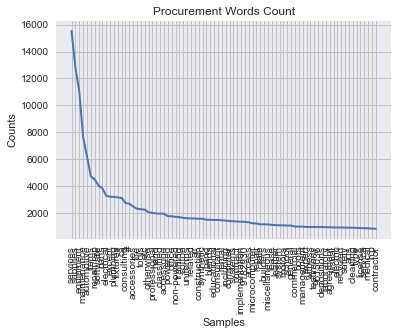

In [788]:
string_quoted_text = proc_data.commodity.str.cat(sep=' ').lower()
words = nltk.tokenize.word_tokenize(string_quoted_text)
good_words = [i for i in words if i not in stop] # stop words
fdist = FreqDist(good_words)
common_quoted_text_40 = fdist.most_common(80)
df = pd.DataFrame(common_quoted_text_40, columns = ['word','count'])
fdist.plot(80,title='Procurement Words Count')

In [814]:
len(proc_data)

73848

In [819]:
word_count = []
for word in ['services','items','supplies','goods','repair','repair/rep','software','rehabilitation','construction','demolition','restoration','services','service','supply','output','fixtures','plumbing','parts','electrical'
    ]:
    word_count.append(dict(fdist)[word])

sum(word_count)


74701

In [817]:
common_quoted_text_40

[('services', 15526),
 ('supplies', 12798),
 ('equipment', 11066),
 ('maintenance', 7652),
 ('automotive', 6214),
 ('items', 4726),
 ('repair/rep', 4490),
 ('software', 4041),
 ('parts', 3828),
 ('electrical', 3278),
 ('except', 3200),
 ('plumbing', 3189),
 ('fixtures', 3158),
 ('ca', 3112),
 ('consulting', 2738),
 ('#', 2684),
 ('accessories', 2464),
 ('fire', 2310),
 ('tools', 2283),
 ('etc', 2236),
 ('otherwise', 2057),
 ('professional', 2000),
 ('hand', 1957),
 ('classified', 1949),
 ('accessorie', 1937),
 ('powered', 1757),
 ('office', 1750),
 ('non-powered', 1704),
 ('training', 1687),
 ('cotton', 1627),
 ('uniforms', 1597),
 ('related', 1591),
 ('air', 1582),
 ('construction', 1567),
 ('synthetic', 1565),
 ('band', 1495),
 ('blends', 1486),
 ('educational', 1476),
 ('consultant', 1474),
 ('rental', 1458),
 ('including', 1422),
 ('computer', 1400),
 ('systems', 1379),
 ('contract', 1364),
 ('implementation', 1346),
 ('9182930', 1335),
 ('access', 1301),
 ('microcomputer', 1230),


In [820]:
proc_data.commodity.value_counts()

AUTOMOTIVE MAINTENANCE ITEMS AND        REPAIR/REP                                                                                                                                                                                                                4490
PLUMBING EQUIPMENT, FIXTURES, AND       SUPPLIES                                                                                                                                                                                                                  3137
ELECTRICAL EQUIPMENT AND SUPPLIES       (EXCEPT CA                                                                                                                                                                                                                3111
HAND TOOLS (POWERED AND NON-POWERED),   ACCESSORIE                                                                                                                                                                 

In [931]:
categories = {'works': ['rehabilitation',
 'construction','demolition','restoration','electrical','plumbing','carpentry','rehabilitation','restoration','repair','repairs','repair/rep'],
'services':['services','services','control','systems','system','inspection','treat','protect','output'],
             'goods':['items','fixtures','materials','equipment','supplies']}

def segment_commodoties(categories, series, new_dict):
    if type(series) == float:
        return
    for good in categories['goods']:
        if good.upper() in series.split():
            new_dict['goods'].append(series)
            return 'good'
    for work in categories['works']:
        if work.upper() in series.split():
            new_dict['works'].append(series)
            return 'work'
    for service in categories['services']:
        if service.upper() in series.split():
            new_dict['services'].append(series)
            return 'service'
    new_dict['goods'].append(series)
    return 'work'

cat_dict ={'goods':[],'works':[],'services':[]}
proc_data['procurementCategory'] = proc_data.commodity.apply(lambda x: segment_commodoties(categories,x,cat_dict))

In [932]:
total_list = []
for valus in cat_dict.values():
    total_list.append(len(valus))

sum(total_list)

72747

In [933]:
check_na(proc_data)

value,False,True
variable,,
amount,73848,0
commodity,72747,1101
createdate,73848,0
procurementCategory,72747,1101
vendorname,73848,0


In [821]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_auc_score, auc
from sklearn import preprocessing
from collections import Counter, OrderedDict
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [822]:
def create_bag_of_words(corpus,
                       NGRAM_RANGE=(0,1),
                       stop_words = None,
                        stem = False,
                       MIN_DF = 0.05,
                       MAX_DF = 0.95,
                       USE_IDF=False):
    """
    Turn a corpus of text into a bag-of-words.
    
    Parameters
    -----------
    corpus: ls
        test of documents in corpus    
    NGRAM_RANGE: tuple
        range of N-gram. Default (0,1)
    stop_words: ls
        list of commonly occuring words that have little semantic
        value
    stem: bool
        use a stemmer to stem words
    MIN_DF: float
       exclude words that have a frequency less than the threshold
    MAX_DF: float
        exclude words that have a frequency greater than the threshold
    
    
    Returns
    -------
    bag_of_words: scipy sparse matrix
        scipy sparse matrix of text
    features:
        ls of words
    """
    #parameters for vectorizer 
    ANALYZER = "word" #unit of features are single words rather then phrases of words 
    STRIP_ACCENTS = 'unicode'
    stemmer = nltk.SnowballStemmer("english")

    if stem:
        tokenize = lambda x: [stemmer.stem(i) for i in x.split()]
    else:
        tokenize = None
    vectorizer = CountVectorizer(analyzer=ANALYZER,
                                tokenizer=tokenize, 
                                ngram_range=NGRAM_RANGE,
                                stop_words = stop_words,
                                strip_accents=STRIP_ACCENTS,
                                min_df = MIN_DF,
                                max_df = MAX_DF)
    
    bag_of_words = vectorizer.fit_transform( corpus ) #transform our corpus is a bag of words 
    features = vectorizer.get_feature_names()

    if USE_IDF:
        NORM = None #turn on normalization flag
        SMOOTH_IDF = True #prvents division by zero errors
        SUBLINEAR_IDF = True #replace TF with 1 + log(TF)
        transformer = TfidfTransformer(norm = NORM,smooth_idf = SMOOTH_IDF,sublinear_tf = True)
        #get the bag-of-words from the vectorizer and
        #then use TFIDF to limit the tokens found throughout the text 
        tfidf = transformer.fit_transform(bag_of_words)
        
        return tfidf, features
    else:
        return bag_of_words, features

In [892]:
corpus = list(proc_data.commodity[proc_data.commodity.notnull()].get_values())
bag_of_words, features = create_bag_of_words(corpus,
                       NGRAM_RANGE=(0,4),
                       stop_words = list(stopwords.words()),
                        stem = False,
                       MIN_DF = 0.05,
                       MAX_DF = 0.95,
                       USE_IDF=True)

In [893]:
bag_of_words.toarray()

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  2.73771251],
       [ 3.46003569,  0.        ,  0.        , ...,  0.        ,
         0.        ,  2.73771251],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  2.73771251],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [894]:
features

['automotive',
 'automotive maintenance',
 'automotive maintenance items',
 'automotive maintenance items repair',
 'equipment',
 'equipment supplies',
 'items',
 'items repair',
 'items repair rep',
 'maintenance',
 'maintenance items',
 'maintenance items repair',
 'maintenance items repair rep',
 'parts',
 'rep',
 'repair',
 'repair rep',
 'services',
 'software',
 'supplies']

In [895]:
def get_word_counts(bag_of_words, feature_names):
    """
    Get the ordered word counts from a bag_of_words
    
    Parameters
    ----------
    bag_of_words: obj
        scipy sparse matrix from CounterVectorizer
    feature_names: ls
        list of words
        
    Returns
    -------
    word_counts: dict
        Dictionary of word counts
    """
    np_bag_of_words = bag_of_words.toarray()
    word_count = np.sum(np_bag_of_words,axis=0)
    np_word_count = np.asarray(word_count).ravel()
    dict_word_counts = dict( zip(feature_names, np_word_count) )
    
    orddict_word_counts = OrderedDict( 
                                    sorted(dict_word_counts.items(), key=lambda x: x[1], reverse=True), )
    
    return orddict_word_counts

In [896]:
get_word_counts(bag_of_words,features)

OrderedDict([('services', 39592.18118861103),
             ('supplies', 35036.404571192645),
             ('equipment', 31911.149651668984),
             ('maintenance', 25254.046500459095),
             ('automotive', 21500.661773324966),
             ('repair', 20224.259484407899),
             ('equipment supplies', 18432.307321030734),
             ('items', 17644.93359990395),
             ('automotive maintenance', 17024.941002681502),
             ('automotive maintenance items', 16994.317830512769),
             ('automotive maintenance items repair', 16994.317830512769),
             ('items repair', 16994.317830512769),
             ('items repair rep', 16994.317830512769),
             ('maintenance items', 16994.317830512769),
             ('maintenance items repair', 16994.317830512769),
             ('maintenance items repair rep', 16994.317830512769),
             ('rep', 16994.317830512769),
             ('repair rep', 16994.317830512769),
             ('software', 1567

In [897]:
def create_topics(tfidf, features, N_TOPICS=3, N_TOP_WORDS=5,):
    """
    Given a matrix of features of text data generate topics
    
    Parameters
    -----------
    tfidf: scipy sparse matrix
        sparse matrix of text features
    N_TOPICS: int
        number of topics (default 10)
    N_TOP_WORDS: int
        number of top words to display in each topic (default 10)
        
    Returns
    -------
    ls_keywords: ls
        list of keywords for each topics
    doctopic: array
        numpy array with percentages of topic that fit each category
    N_TOPICS: int
        number of assumed topics
    N_TOP_WORDS: int
        Number of top words in a given topic. 
    """
    
    i=0
    lda = LatentDirichletAllocation( n_topics= N_TOPICS,
                                       learning_method='online') #create an object that will create 5 topics
    i+=1
    doctopic = lda.fit_transform( tfidf )
    i+=1
    
    ls_keywords = []
    for i,topic in enumerate(lda.components_):
        word_idx = np.argsort(topic)[::-1][:N_TOP_WORDS]
        keywords = ', '.join( features[i] for i in word_idx)
        ls_keywords.append(keywords)
        print(i, keywords)
        i+=1
            
    return ls_keywords, doctopic

In [900]:
processed_keywords, processed_doctopic = create_topics(bag_of_words,features, N_TOPICS=3,N_TOP_WORDS=10)

0 maintenance, repair, automotive, items, automotive maintenance, repair rep, items repair, automotive maintenance items, automotive maintenance items repair, items repair rep
1 supplies, equipment, equipment supplies, repair, parts, maintenance, services, automotive, software, items
2 services, software, parts, maintenance, automotive, equipment, repair, supplies, items, equipment supplies


services vs. works is not a good distinction.  Services are construction, while works are not? Is that it?

In [941]:
add_year_month_day_df(proc_data,'createdate','create')
proc_data.head(3)

,amount,commodity,createdate,vendorname,procurementCategory,createYear,createMonth,createDay
0,71.64,"PLUMBING EQUIPMENT, FIXTURES, AND SUPPLIES",2017-01-17T00:00:00,LION PLUMBING SUPPLY INC,good,2017,1,1
1,387.36,AUTOMOTIVE SHOP EQUIPMENT AND SUPPLIES,2017-01-11T00:00:00,GENUINE PARTS CO,good,2017,1,2
2,351.44,"OFFICE SUPPLIES, GENERAL",2017-01-04T00:00:00,J & E OFFICE SUPPLIES INC,work,2017,1,2


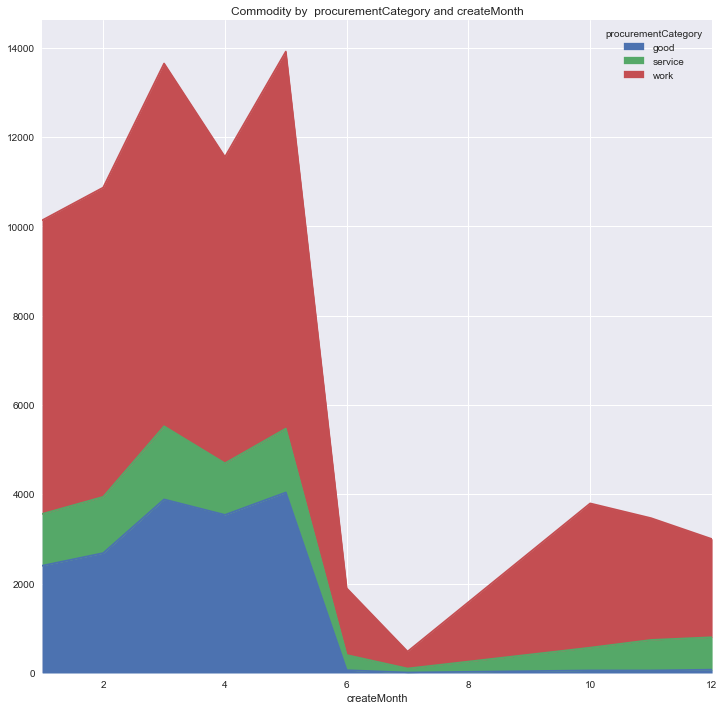

In [949]:
make_area_stacked_df(proc_data, 'createMonth', 'procurementCategory', 'Commodity by ')